In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
from time import time
%matplotlib inline
import seaborn as sns
sns.set(font="DejaVu Sans")

In [2]:
# A function to create a formatted confusion matrix for each model
def pretty_confusion(y_test, preds):
    cm = confusion_matrix(y_test, preds)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt=',', cbar=False); 

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix\nF1 Score: ' + str(f1_score(y_test, preds))); 
    ax.xaxis.set_ticklabels(['non-match', 'match']); ax.yaxis.set_ticklabels(['match', 'non-match'])

In [3]:
dfFeatures = pd.read_csv('dfFeatures.csv', index_col=0)
results = []

# Model Building

Training and testing data is defined.  The "MATCH" variable is used as the target variable.  Data is split randomly using sklearn's train_test_split.  One-third of the data is held out as a testing set, while the other two-thirds is used to train the model.  

In [4]:
X = dfFeatures[['phone_scaled'
                , 'last_name_scaled'
                , 'first_name_scaled'
                , 'city_scaled'
                , 'address_1_scaled'
                , 'dob_scaled'
                , 'zip_scaled'
                , 'similarity']]
y = dfFeatures['MATCH'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Training Time:  0.023403644561767578
Prediction Time:  0.006327390670776367
None
             precision    recall  f1-score   support

          0     0.9998    0.9999    0.9999     53059
          1     0.9994    0.9980    0.9987      4926

avg / total     0.9998    0.9998    0.9998     57985



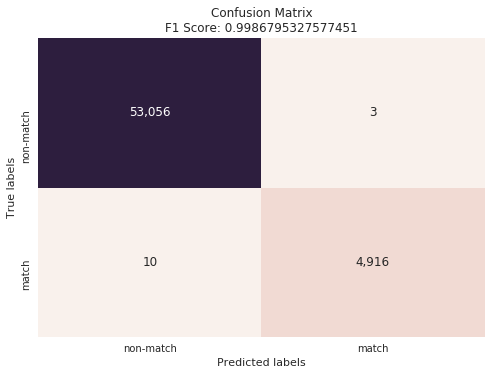

In [5]:
gnb = GaussianNB()

t1 = time()
gnb.fit(X_train, y_train)
t2 = time()
preds = gnb.predict(X_test)
t3 = time()

gnb_training_time = t2-t1
gnb_prediction_time = t3-t2
gnb_f1 = f1_score(y_test, preds)
gnb_precision = precision_score(y_test, preds)
gnb_recall = recall_score(y_test, preds)

results.append(['Gaussian Naive Bayes', gnb_training_time, gnb_prediction_time, gnb_f1, gnb_precision, gnb_recall])

print('Training Time: ', gnb_training_time)
print('Prediction Time: ', gnb_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Training Time:  0.30428481101989746
Prediction Time:  0.0010647773742675781
None
             precision    recall  f1-score   support

          0     0.9997    1.0000    0.9998     53059
          1     1.0000    0.9963    0.9982      4926

avg / total     0.9997    0.9997    0.9997     57985



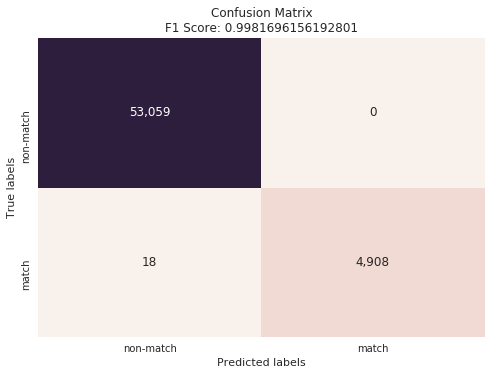

In [6]:
lr = LogisticRegression()

t1 = time()
lr.fit(X_train, y_train)
t2 = time()
preds = lr.predict(X_test)
t3 = time()

lr_training_time = t2-t1
lr_prediction_time = t3-t2
lr_f1 = f1_score(y_test, preds)
lr_precision = precision_score(y_test, preds)
lr_recall = recall_score(y_test, preds)

results.append(['Logistic Regression', lr_training_time, lr_prediction_time, lr_f1, lr_precision, lr_recall])

print('Training Time: ', lr_training_time)
print('Prediction Time: ', lr_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Training Time:  0.18503427505493164
Prediction Time:  0.0024118423461914062
None
             precision    recall  f1-score   support

          0     0.9999    0.9999    0.9999     53059
          1     0.9990    0.9990    0.9990      4926

avg / total     0.9998    0.9998    0.9998     57985



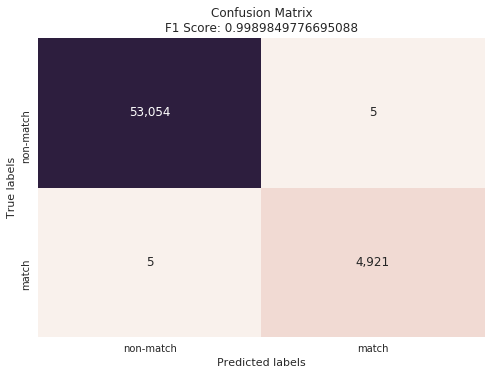

In [7]:
dtc = DecisionTreeClassifier(random_state=42)

t1 = time()
dtc.fit(X_train, y_train)
t2 = time()
preds = dtc.predict(X_test)
t3 = time()

dtc_training_time = t2-t1
dtc_prediction_time = t3-t2
dtc_f1 = f1_score(y_test, preds)
dtc_precision = precision_score(y_test, preds)
dtc_recall = recall_score(y_test, preds)

results.append(['Decision Tree', dtc_training_time, dtc_prediction_time, dtc_f1, dtc_precision, dtc_recall])


print('Training Time: ', dtc_training_time)
print('Prediction Time: ', dtc_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

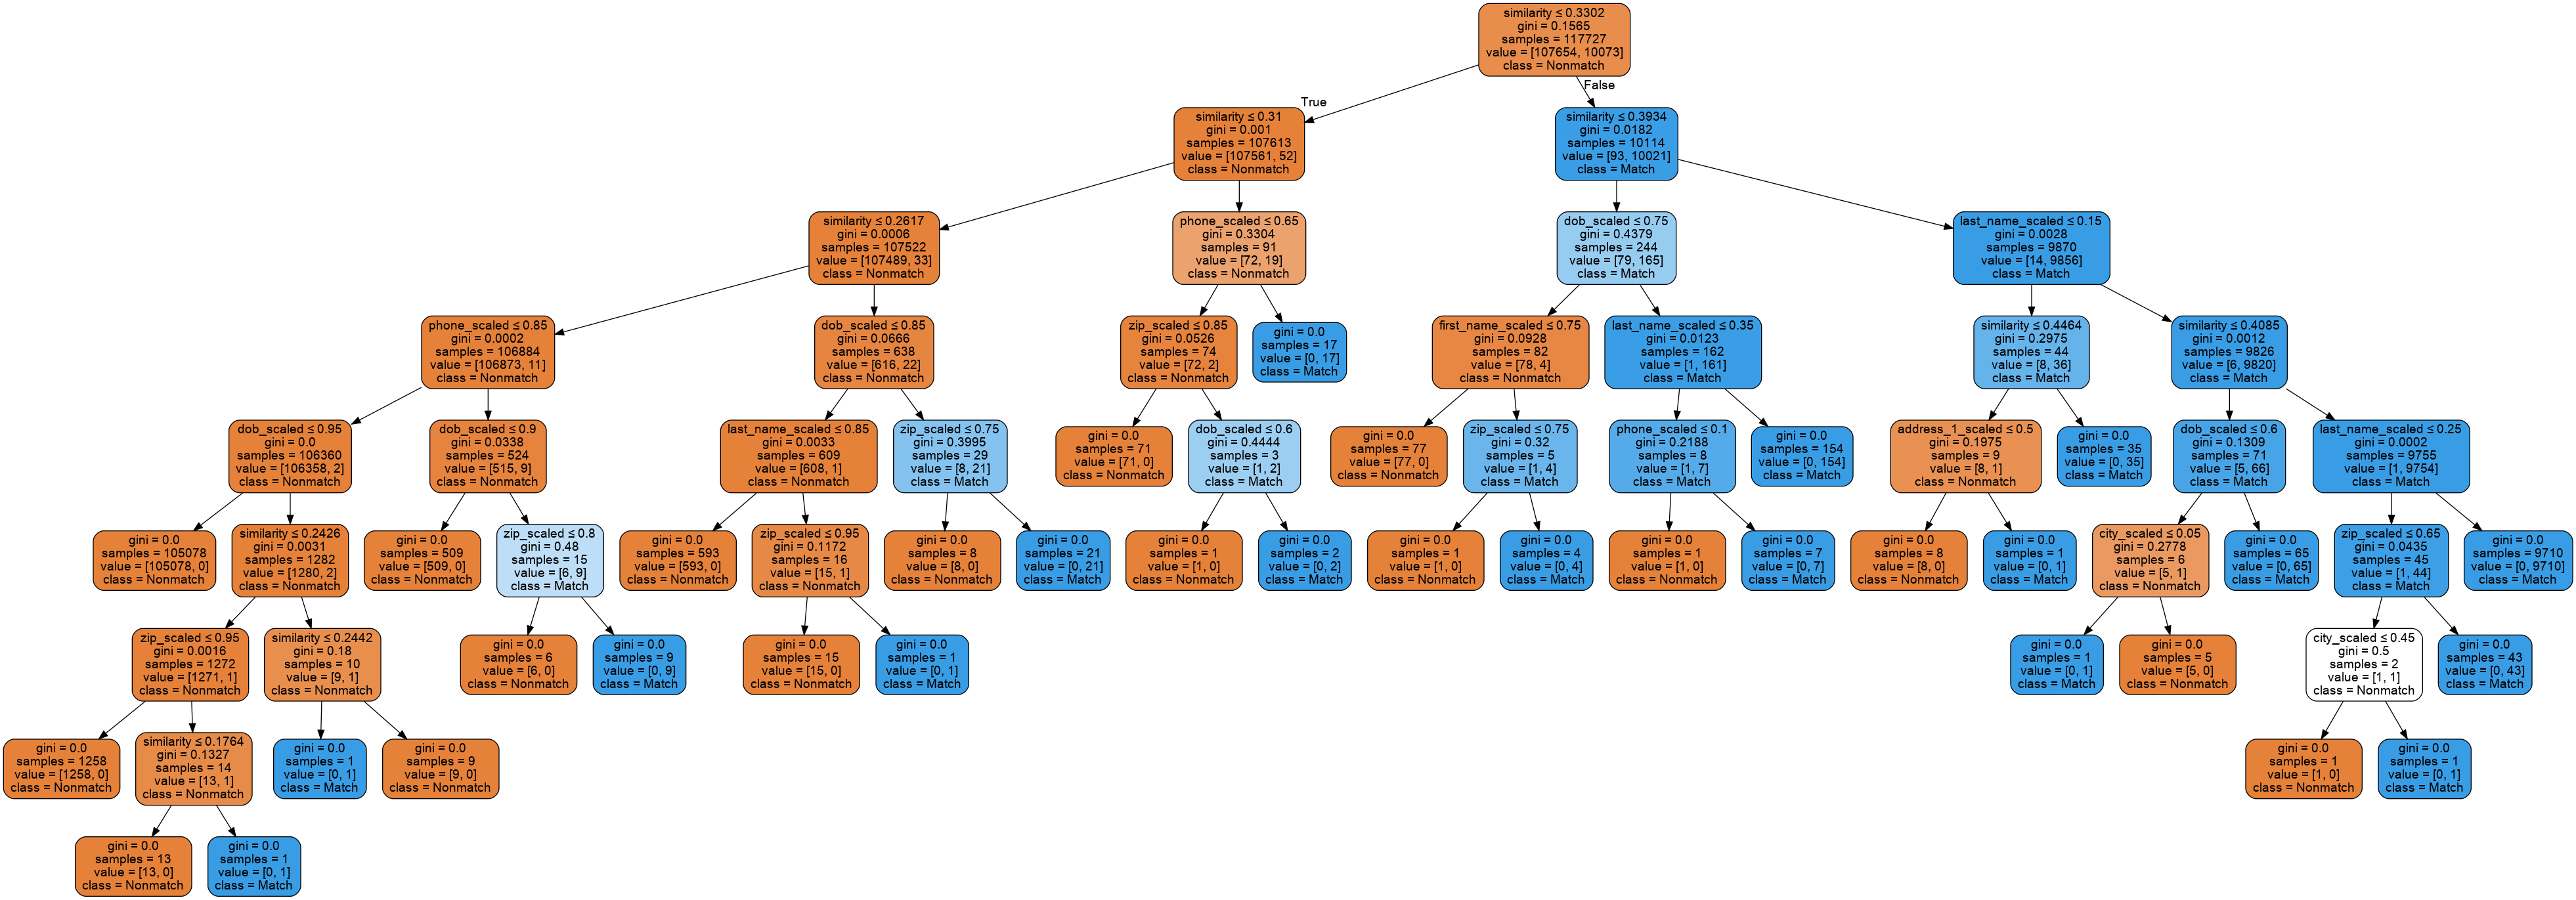

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

names = X.columns

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,  
                rounded=True, filled=True,
                special_characters=True,
                feature_names = names,
                class_names = ['Nonmatch', 'Match']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Training Time:  3.1682746410369873
Prediction Time:  0.3289649486541748
None
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000     53059
          1     1.0000    0.9996    0.9998      4926

avg / total     1.0000    1.0000    1.0000     57985



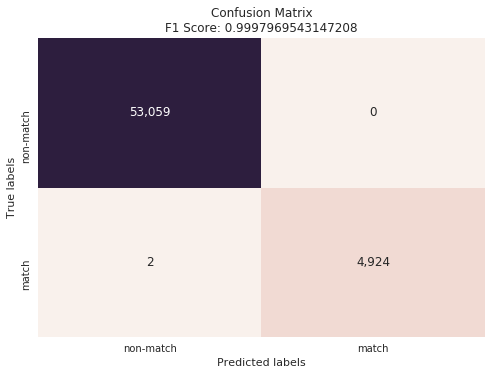

In [9]:
ada = AdaBoostClassifier(random_state=42)

t1 = time()
ada.fit(X_train, y_train)
t2 = time()
preds = ada.predict(X_test)
t3 = time()

ada_training_time = t2-t1
ada_prediction_time = t3-t2
ada_f1 = f1_score(y_test, preds)
ada_precision = precision_score(y_test, preds)
ada_recall = recall_score(y_test, preds)

results.append(['Adaboost', ada_training_time, ada_prediction_time, ada_f1, ada_precision, ada_recall])

print('Training Time: ', ada_training_time)
print('Prediction Time: ', ada_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [11]:
def create_model_deep():
    model = Sequential()
    model.add(Dense(6, input_dim=8, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def create_model_wide():
    model = Sequential()
    model.add(Dense(24, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def create_model_small():
    model = Sequential()
    model.add(Dense(4, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Training Time:  43.70628786087036
Prediction Time:  0.3871574401855469
None
             precision    recall  f1-score   support

          0     0.9999    1.0000    1.0000     53059
          1     0.9998    0.9992    0.9995      4926

avg / total     0.9999    0.9999    0.9999     57985



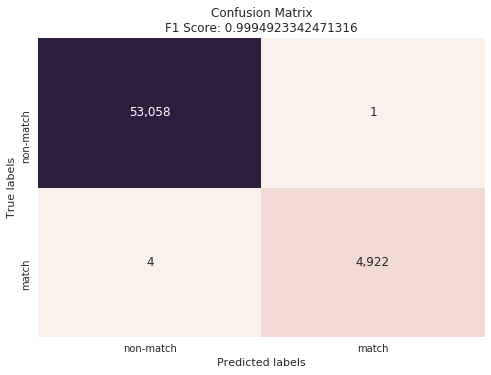

In [12]:
mlp_small = KerasClassifier(build_fn=create_model_small, epochs=20, batch_size=50, verbose=0)

t1 = time()
mlp_small.fit(X_train, y_train)
t2 = time()
preds = mlp_small.predict(X_test)
t3 = time()

mlp_small_training_time = t2-t1
mlp_small_prediction_time = t3-t2
mlp_small_f1 = f1_score(y_test, preds)
mlp_small_precision = precision_score(y_test, preds)
mlp_small_recall = recall_score(y_test, preds)

results.append(['MLP Small', mlp_small_training_time, mlp_small_prediction_time
                , mlp_small_f1, mlp_small_precision, mlp_small_recall])

print('Training Time: ', mlp_small_training_time)
print('Prediction Time: ', mlp_small_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Training Time:  44.172916650772095
Prediction Time:  0.41462087631225586
None
             precision    recall  f1-score   support

          0     0.9999    1.0000    0.9999     53059
          1     0.9998    0.9990    0.9994      4926

avg / total     0.9999    0.9999    0.9999     57985



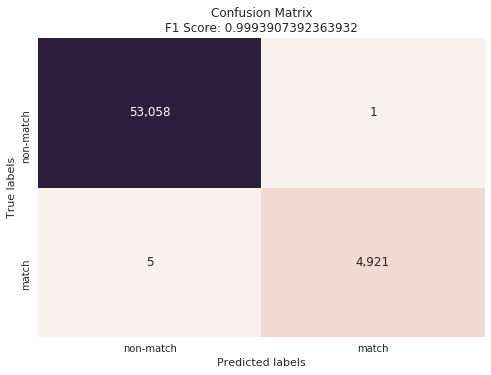

In [13]:
mlp_deep = KerasClassifier(build_fn=create_model_small, epochs=20, batch_size=50, verbose=0)

t1 = time()
mlp_deep.fit(X_train, y_train)
t2 = time()
preds = mlp_deep.predict(X_test)
t3 = time()

mlp_deep_training_time = t2-t1
mlp_deep_prediction_time = t3-t2
mlp_deep_f1 = f1_score(y_test, preds)
mlp_deep_precision = precision_score(y_test, preds)
mlp_deep_recall = recall_score(y_test, preds)

results.append(['MLP Deep', mlp_deep_training_time, mlp_deep_prediction_time
                , mlp_deep_f1, mlp_deep_precision, mlp_deep_recall])

print('Training Time: ', mlp_deep_training_time)
print('Prediction Time: ', mlp_deep_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Training Time:  44.56285357475281
Prediction Time:  0.4110219478607178
None
             precision    recall  f1-score   support

          0     0.9999    1.0000    1.0000     53059
          1     0.9998    0.9994    0.9996      4926

avg / total     0.9999    0.9999    0.9999     57985



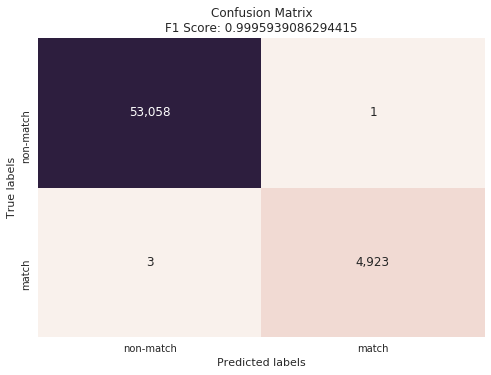

In [14]:
mlp_wide = KerasClassifier(build_fn=create_model_small, epochs=20, batch_size=50, verbose=0)

t1 = time()
mlp_wide.fit(X_train, y_train)
t2 = time()
preds = mlp_wide.predict(X_test)
t3 = time()

mlp_wide_training_time = t2-t1
mlp_wide_prediction_time = t3-t2
mlp_wide_f1 = f1_score(y_test, preds)
mlp_wide_precision = precision_score(y_test, preds)
mlp_wide_recall = recall_score(y_test, preds)

results.append(['MLP Wide', mlp_wide_training_time, mlp_wide_prediction_time
                , mlp_wide_f1, mlp_wide_precision, mlp_wide_recall])

print('Training Time: ', mlp_wide_training_time)
print('Prediction Time: ', mlp_wide_prediction_time)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Features sorted by their score:
   Importance            Feature
0        0.24         similarity
1        0.18         zip_scaled
2        0.18         dob_scaled
3        0.10       phone_scaled
4        0.10   last_name_scaled
5        0.08  first_name_scaled
6        0.08        city_scaled
7        0.04   address_1_scaled


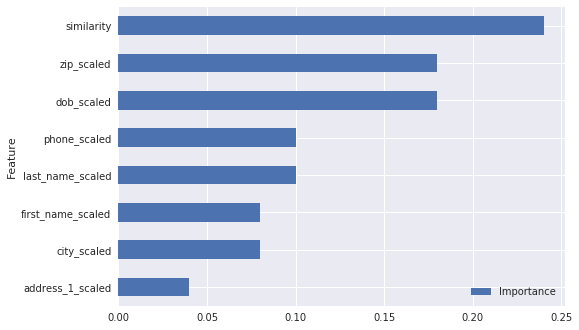

In [15]:
# Feature importances from the Adaboost Classifier
f = pd.DataFrame(sorted(zip(ada.feature_importances_
                                       , names), reverse=True
                                  ), columns = ['Importance', 'Feature'])
print("Features sorted by their score:")
print(f)

f.plot(x='Feature',y='Importance', kind='barh')
plt.gca().invert_yaxis()

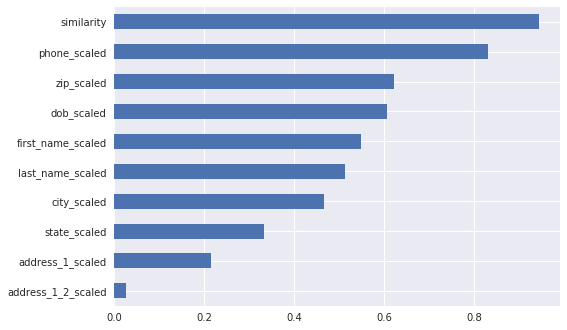

In [16]:
# Pearson's correlation between various features and MATCH
dfFeatures.corr()['MATCH'].sort_values().drop('MATCH').plot('barh')

In [17]:
dfFeatures.drop('MATCH', axis=1).head()

,id_org,id_match,phone_scaled,last_name_scaled,first_name_scaled,city_scaled,state_scaled,address_1_scaled,address_1_2_scaled,dob_scaled,zip_scaled,similarity
0,rec-0-org,rec-0-dup-0,1.0,1.0,1.0,0.7,1.0,0.8,0.0,1.0,1.0,0.683051
47132,rec-17305-org,rec-0-dup-0,0.0,0.8,1.0,0.2,0.8,0.0,0.0,0.5,0.7,0.138749
63515,rec-19801-org,rec-0-dup-0,0.0,0.4,0.4,0.4,0.7,0.3,0.0,0.4,0.7,0.113165
89764,rec-23883-org,rec-0-dup-0,0.4,0.3,0.5,0.2,0.8,0.3,0.0,0.7,0.6,0.101841
1,rec-0-org,rec-0-dup-1,0.9,0.8,0.9,1.0,1.0,0.8,0.0,1.0,1.0,0.652186


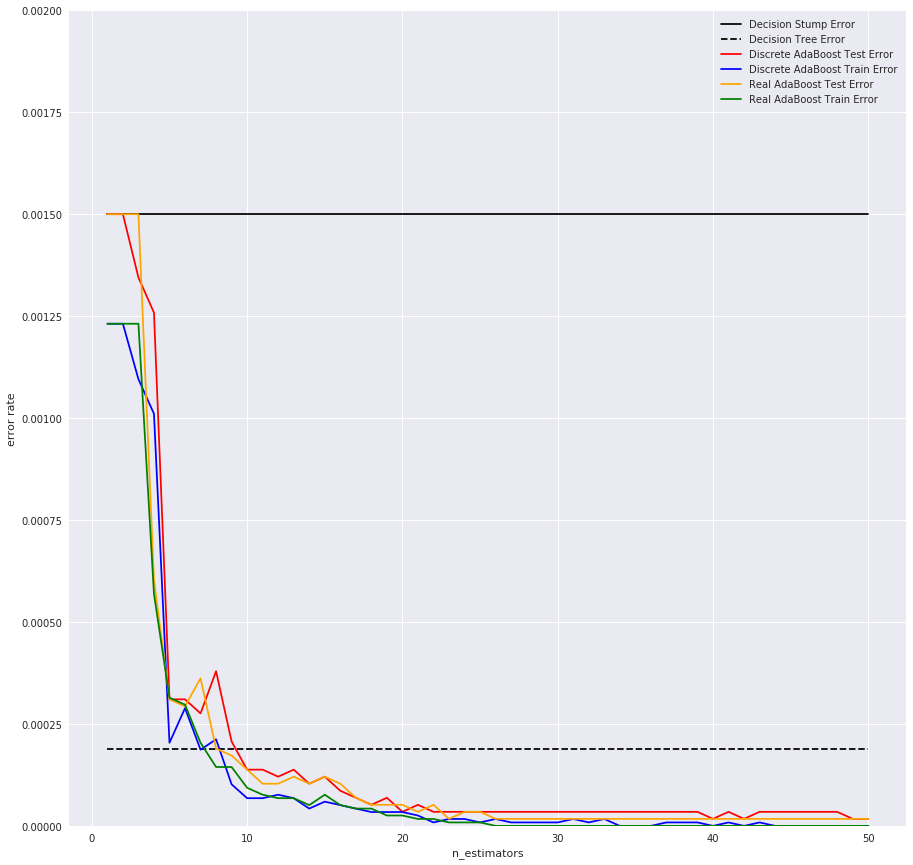

In [18]:
#Ref:  http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier


n_estimators = 50
learning_rate = 0.5

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.002))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=1.0, n_estimators=25, random_state=42)
None
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000     53059
          1     1.0000    0.9996    0.9998      4926

avg / total     1.0000    1.0000    1.0000     57985



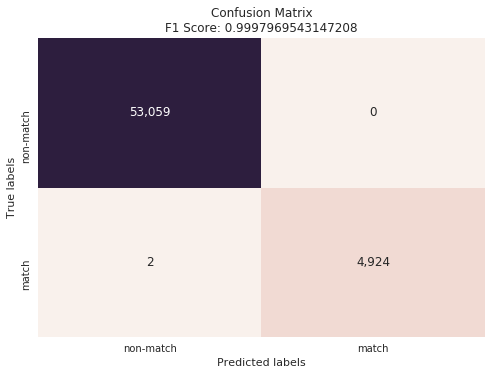

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_features" :   [3, 5, 8],
              "base_estimator__min_samples_split" :   [2, 3, 4],
              "n_estimators": [25, 50, 100],
              "algorithm": ['SAMME.R', 'SAMME'],
              "learning_rate": [0.1, 0.5, 1.0]
             }


dtc2 = DecisionTreeClassifier()
ada2 = AdaBoostClassifier(base_estimator = dtc2, random_state=42)

# run grid search
grid_search_ada = GridSearchCV(ada2, param_grid=param_grid, scoring = 'f1')
grid_search_ada.fit(X_train, y_train)

best_ada = grid_search_ada.best_estimator_
t2 =  time()
preds = best_ada.predict(X_test)
t3 = time()

best_ada_f1 = f1_score(y_test, preds)
best_ada_precision = precision_score(y_test, preds)
best_ada_recall = recall_score(y_test, preds)
best_ada_prediction_time = t3-t2

results.append(['Adaboost Tuned', 'NA', best_ada_prediction_time
                , best_ada_f1, best_ada_precision, best_ada_recall])

print(best_ada)
print(pretty_confusion(y_test, preds))
print(classification_report(y_test, preds, digits=4))

In [20]:
dfResults = pd.DataFrame(results, columns = ['Algorithm'
                                 , 'Training Time'
                                 , 'Prediction Time'
                                 , 'F1 Score'
                                 , 'Precision'
                                 , 'Recall'])
bench = dfResults['F1 Score'][dfResults.Algorithm=='Gaussian Naive Bayes'][0]

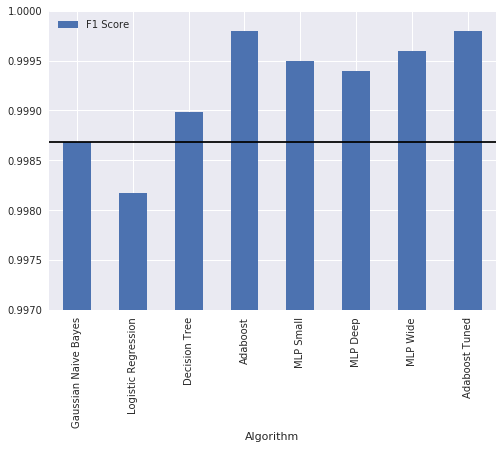

In [21]:
dfResults.plot(x='Algorithm', y='F1 Score', kind='bar', ylim=[.997, 1]) 
plt.axhline(y=gnb_f1, color='black')

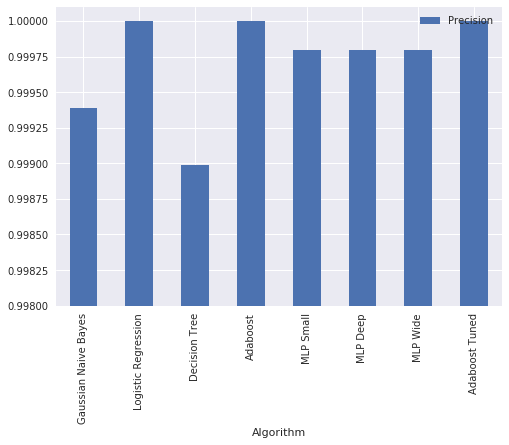

In [22]:
dfResults.plot(x='Algorithm', y='Precision', kind='bar', ylim=[.998, 1.0001]) 

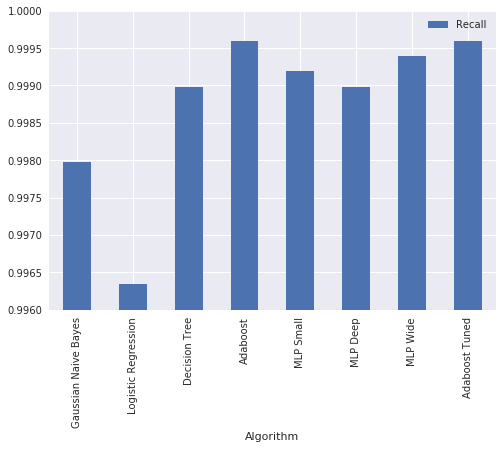

In [23]:
dfResults.plot(x='Algorithm', y='Recall', kind='bar', ylim=[.996, 1]) 

In [24]:
dfResults

,Algorithm,Training Time,Prediction Time,F1 Score,Precision,Recall
0,Gaussian Naive Bayes,0.0234036,0.006327,0.998680,0.999390,0.997970
1,Logistic Regression,0.304285,0.001065,0.998170,1.000000,0.996346
2,Decision Tree,0.185034,0.002412,0.998985,0.998985,0.998985
3,Adaboost,3.16827,0.328965,0.999797,1.000000,0.999594
4,MLP Small,43.7063,0.387157,0.999492,0.999797,0.999188
5,MLP Deep,44.1729,0.414621,0.999391,0.999797,0.998985
6,MLP Wide,44.5629,0.411022,0.999594,0.999797,0.999391
7,Adaboost Tuned,NA,0.203119,0.999797,1.000000,0.999594


In [25]:
filename = 'best_ada.pkl'
pickle.dump(best_ada, open(filename, 'wb'))

In [27]:
pickle.dump(ada, open('ada.pkl', 'wb'))
pickle.dump(dtc, open('dtc.pkl', 'wb'))
pickle.dump(lr, open('lr.pkl', 'wb'))
pickle.dump(gnb, open('gnb.pkl', 'wb'))